In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('../Codes - Datasets/fraudTrain.csv')
test_data = pd.read_csv('../Codes - Datasets/fraudTest.csv')

In [3]:
train_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
test_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
train_data.shape

(1296675, 22)

In [7]:
test_data.shape

(555719, 22)

In [8]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [9]:
train_data.duplicated().sum()

np.int64(0)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [11]:
#obj_columns

 # #1 - Exploratory Data Analysis

<Axes: xlabel='is_fraud', ylabel='count'>

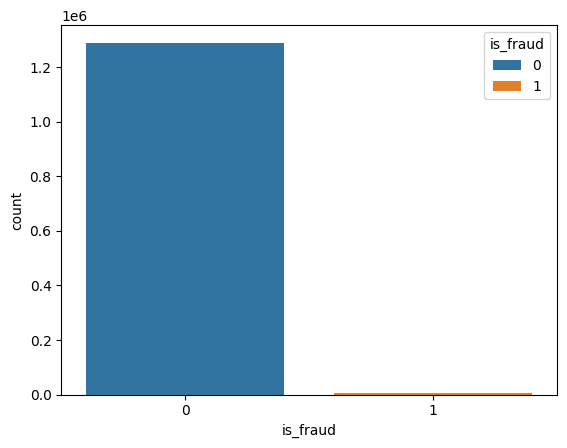

In [12]:
sns.countplot( x ='is_fraud', data = train_data, hue = 'is_fraud')

#### Its an Highly Imbalanced Dataset since fraud transaction is too low

<Axes: >

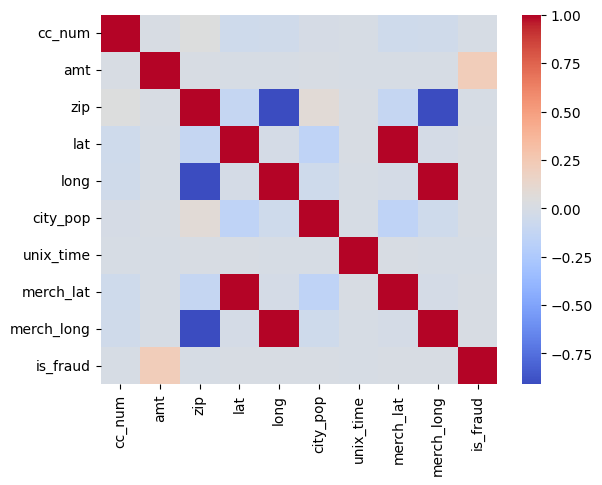

In [13]:
sns.heatmap(train_data.corr(numeric_only = True),  cmap='coolwarm')

### Here we can see that merch_lat and lat are highly correlated and the same is with merch_long and long

# #2 - Feature Engineering

In [14]:
train_data.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


### Columns to drop - first, last, lat, long, unix_time, trans_num

In [15]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

In [16]:
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['day'] = train_data['trans_date_trans_time'].dt.day
train_data['month'] = train_data['trans_date_trans_time'].dt.month
train_data['birth_year'] = pd.to_datetime(train_data['dob']).dt.year

test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['day'] = test_data['trans_date_trans_time'].dt.day
test_data['month'] = test_data['trans_date_trans_time'].dt.month
test_data['birth_year'] = pd.to_datetime(test_data['dob']).dt.year

train_data['age_category'] = train_data['birth_year'].apply(lambda x: 'Young' if x >= 1990 else 'Middle_Age' if x >= 1970 else 'Older')
test_data['age_category'] = test_data['birth_year'].apply(lambda x: 'Young' if x >= 1990 else 'Middle_Age' if x >= 1970 else 'Older')

In [17]:
train_data[['hour', 'day', 'month']] = train_data[['hour', 'day', 'month']].astype('object')

In [18]:
train_data['day'] = np.where(train_data['day'] >= 5, 'Weekend', 'Weekday')
test_data['day'] = np.where(test_data['day'] >= 5, 'Weekend', 'Weekday')

train_data['hour'] = np.where(train_data['hour'].between(6, 18), 'Day', 'Night')
test_data['hour'] = np.where(test_data['hour'].between(6, 18), 'Day', 'Night')

train_data['month'] = np.where(train_data['month'] <= 6, 'First_Half', 'Second_Half')
test_data['month'] = np.where(test_data['month'] <= 6, 'First_Half', 'Second_Half')

train_data['merchant_category'] = train_data['merchant'].map(train_data['merchant'].value_counts()).apply(lambda x: 'High_Volume_Merchant' if x >= 3000 else 'Medium_Volume_Merchant' if x >= 1500 else 'Low_Volume_Merchant' if x >= 500 else 'Very_Low_Volume_Merchant')

test_data['merchant_category'] = test_data['merchant'].map(train_data['merchant'].value_counts()).fillna(0).apply(lambda x: 'High_Volume_Merchant' if x >= 3000 else 'Medium_Volume_Merchant' if x >= 1500 else 'Low_Volume_Merchant' if x >= 500 else 'Very_Low_Volume_Merchant')

train_data['gender_encoded'] = train_data['gender'].map({'F': 0, 'M': 1})
test_data['gender_encoded'] = test_data['gender'].map({'F': 0, 'M': 1})

In [19]:
city_fraud_rates = train_data.groupby('city')['is_fraud'].mean()
train_data['city_fraud_rate'] = train_data['city'].map(city_fraud_rates)
city_fraud_rates = test_data.groupby('city')['is_fraud'].mean()
test_data['city_fraud_rate'] = test_data['city'].map(city_fraud_rates)

state_fraud_rates = train_data.groupby('state')['is_fraud'].mean() 
train_data['state_fraud_rate'] = train_data['state'].map(state_fraud_rates)
state_fraud_rates = test_data.groupby('state')['is_fraud'].mean() 
test_data['state_fraud_rate'] = test_data['state'].map(state_fraud_rates)

In [20]:
train_cat_dummies = pd.get_dummies(train_data['category'], prefix='cat',dtype='int', drop_first=True )
test_cat_dummies = pd.get_dummies(test_data['category'], prefix='cat', drop_first=True, dtype='int')


train_cat_dummies, test_cat_dummies = train_cat_dummies.align(test_cat_dummies, join='left', axis=1, fill_value=0)


train_data = pd.concat([train_data, train_cat_dummies], axis=1)
test_data = pd.concat([test_data, test_cat_dummies], axis=1)

In [21]:
train_data.drop(columns = ['merchant', 'gender','job','street', 'first', 'last','category', 'lat','state', 'city', 'long', 'unix_time', 'trans_num', 'trans_date_trans_time', 'dob', 'birth_year'], inplace = True, axis = 1)
test_data.drop(columns = ['merchant', 'gender','job','street', 'first', 'last','category', 'lat', 'state', 'city', 'long', 'unix_time', 'trans_num', 'trans_date_trans_time', 'dob', 'birth_year'], inplace = True, axis = 1)

In [23]:
train_data.shape

(1296675, 28)

In [45]:
columns = train_data.columns
obj_columns = []
for feature in columns:
    if train_data[feature].dtype == 'object':
        obj_columns.append(feature)
        print(f"\nValue counts for {feature}:")
        print(train_data[feature].value_counts())


Value counts for hour:
hour
Day      711620
Night    585055
Name: count, dtype: int64

Value counts for day:
day
Weekend    1121517
Weekday     175158
Name: count, dtype: int64

Value counts for month:
month
First_Half     771829
Second_Half    524846
Name: count, dtype: int64

Value counts for age_category:
age_category
Middle_Age    596357
Older         462820
Young         237498
Name: count, dtype: int64

Value counts for merchant_category:
merchant_category
Medium_Volume_Merchant    1127340
Low_Volume_Merchant        147212
High_Volume_Merchant        22123
Name: count, dtype: int64


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['hour', 'day', 'month', 'age_category', 'merchant_category'])
], remainder='passthrough')

In [47]:
train_1 = transformer.fit_transform(train_data)
test_1 = transformer.transform(test_data)

In [48]:
columns = [
'hour_night',
'day_weekend',
'month_second_half',
'age_older',
'age_young',
'Low_Volume_Merchant',
'High_Volume_Merchant',    
'cc_num',
 'amt',
 'zip',
 'city_pop',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'gender_encoded',
 'city_fraud_rate',
 'state_fraud_rate',
 'cat_food_dining',
 'cat_gas_transport',
 'cat_grocery_net',
 'cat_grocery_pos',
 'cat_health_fitness',
 'cat_home',
 'cat_kids_pets',
 'cat_misc_net',
 'cat_misc_pos',
 'cat_personal_care',
 'cat_shopping_net',
 'cat_shopping_pos',
 'cat_travel'
]

In [49]:
train_1 = pd.DataFrame(train_1, columns=columns)

In [50]:
test_1 = pd.DataFrame(test_1, columns=columns)

In [51]:
train_1.shape

(1296675, 30)

In [52]:
test_1.head()

,hour_night,day_weekend,month_second_half,age_older,age_young,Low_Volume_Merchant,High_Volume_Merchant,cc_num,amt,zip,...,cat_grocery_pos,cat_health_fitness,cat_home,cat_kids_pets,cat_misc_net,cat_misc_pos,cat_personal_care,cat_shopping_net,cat_shopping_pos,cat_travel
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.291164e+15,2.86,29209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.573030e+15,29.84,84002.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.598215e+15,41.28,11710.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.591920e+15,60.05,32780.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.526826e+15,3.19,49632.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
